# Import Libraries

In [1]:
import mesa
import numpy as np
from swarm_model import SwarmModel
from entity_classes.target import Target

from IPython import display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Visualize Model

MovieWriter ffmpeg unavailable; using Pillow instead.


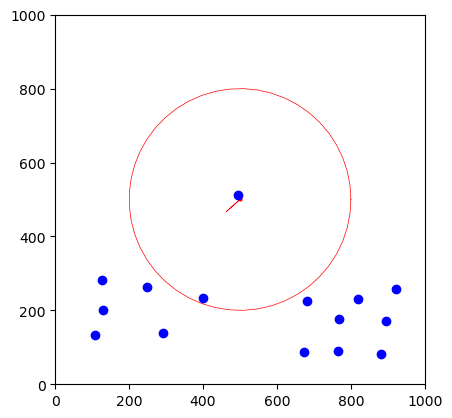

In [2]:
model = SwarmModel(
    n_drones = 15, 
    domain_width = 1000, 
    domain_height = 1000, 
    drone_diameter = 1, 
    target_vis_radius = 300,
    drone_vis_radius = 100,
    drone_weapon_radius = 15
)

target_x, target_y = model.schedule.agents[model.target_id].pos

# target orientation parameters
target_vis_radius = model.schedule.agents[model.target_id].vis_radius
arrow_half_len    = target_vis_radius / 6
arrow_angle       = model.schedule.agents[model.target_id].direction
arrow_start_x     = target_x
arrow_start_y     = target_y
arrow_dx          = arrow_half_len * np.cos(arrow_angle)
arrow_dy          = arrow_half_len * np.sin(arrow_angle)

# create a figure and axis objects
fig, ax = plt.subplots()

# set axis limits
ax.set_xlim([0, model.domain.width])
ax.set_ylim([0, model.domain.height])

# plot the target's vis. radius
theta = np.linspace(0, 2*np.pi)
vrx, vry = target_vis_radius * np.array([ np.cos(theta), np.sin(theta) ])
vrx += target_x
vry += target_y
ax.plot(vrx, vry, 'r', linewidth=.5)

# plot the target's orientation
plt.arrow(arrow_start_x, arrow_start_y, arrow_dx, arrow_dy, color='r', linewidth=.5)
ax.set_aspect('equal')

# plot all the drones as blue circles
for drone in model.schedule.agents:
    if isinstance(drone, Target): continue
    drone_x, drone_y = drone.pos
    ax.plot(drone_x, drone_y, 'bo')

# function to update the plot at each time step
def animate(i):
    # step the model
    model.step()
    
    # clear the axis
    ax.clear()
    
    # set axis limits
    ax.set_xlim([0, model.domain.width])
    ax.set_ylim([0, model.domain.height])
    
    target_x, target_y = model.schedule.agents[model.target_id].pos

    # target orientation parameters
    arrow_angle       = model.schedule.agents[model.target_id].direction
    arrow_start_x     = target_x
    arrow_start_y     = target_y
    arrow_dx          = arrow_half_len * np.cos(arrow_angle)
    arrow_dy          = arrow_half_len * np.sin(arrow_angle)
    
    # plot the target as a red circle
    target_x, target_y = model.schedule.agents[model.target_id].pos
    ax.plot(target_x, target_y, 'ro', markersize=2)

    # plot the target's vis. radius
    ax.plot(vrx, vry, 'r', linewidth=.5)

    # plot the target's orientation
    plt.arrow(arrow_start_x, arrow_start_y, arrow_dx, arrow_dy, color='red', linewidth=.5)

    # plot all the drones as blue circles
    for drone in model.schedule.agents:
        if isinstance(drone, Target): continue
        drone_x, drone_y = drone.pos
        ax.plot(drone_x, drone_y, 'bo')

# create the animation
animation = FuncAnimation(fig, animate, frames=50, interval=150)

animation.save("animation.gif")